# Explore

In [1]:
import re
import unicodedata
from wordcloud import WordCloud
import pandas as pd
import nltk
import env

import matplotlib.pyplot as plt
import seaborn as sns
import wrangle

In [2]:
train, val, test = wrangle.wrangle_readmes()

Returning Python and Java-script data


In [3]:
# get data
df = train[["language","lemmatized"]]
df.head()

,language,lemmatized
30,Python,google automation python professional certific...
75,JavaScript,movie review database
35,JavaScript,coding train webgithub thecodingtraincom contr...
37,Python,face recognition using tensorflow tensorflow i...
78,JavaScript,eatheblocksblockchain tutorial eattheblocks le...


**Between JavaScript and Python, which language exhibits greater prevalence within the content of the READMEs?**

Python        67
JavaScript    57
Name: language, dtype: int64
Python        0.540323
JavaScript    0.459677
Name: language, dtype: float64


<Axes: >

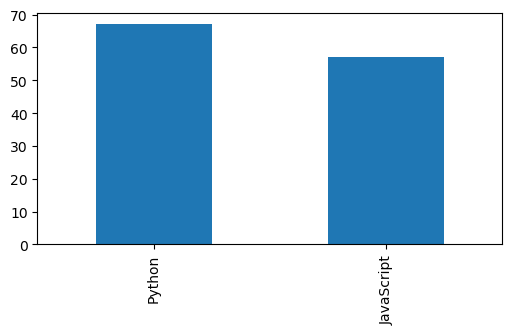

In [4]:
print(df.language.value_counts())
print(df.language.value_counts(normalize=True))
plt.figure(figsize=(6,3))
df.language.value_counts().plot(kind="bar")

- Python programming language appiers to be more commonly used in the content of README files. 

**In a compilation of the top 100 most Forked GitHub repositories, what are the five words that demonstrate the highest frequency of occurrence?**

What are the most frequently occuring words?

- The words that appear in legitimate text messages.
- The words that appear in spam text messages.
- All of the words.

In [5]:
py = df.lemmatized[df.language == "Python"]
js = df.lemmatized[df.language == "JavaScript"]
py_js = df.lemmatized
py.head()

30    google automation python professional certific...
37    face recognition using tensorflow tensorflow i...
62    english espanol stateoftheart machine learning...
78    bert new march 11th 2020 smaller bert model re...
63                         removed according regulation
Name: lemmatized, dtype: object

Text(0, 0.5, 'frequency')

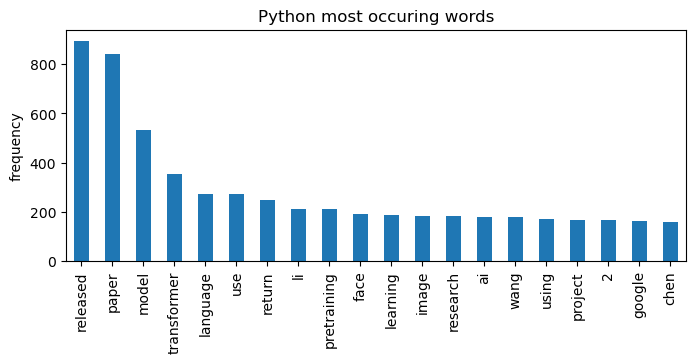

In [6]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(py).split()).value_counts().head(20).plot(kind="bar")
plt.title("Python most occuring words")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

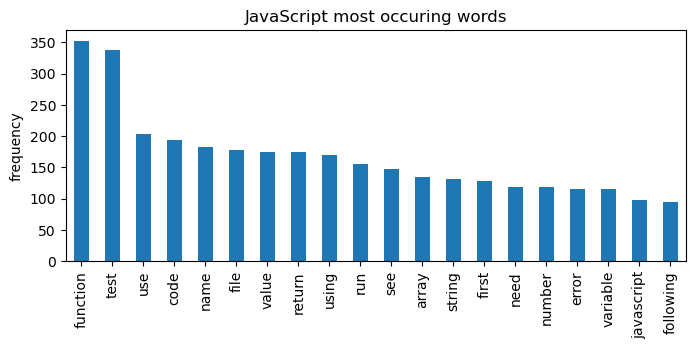

In [7]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(js).split()).value_counts().head(20).plot(kind="bar")
plt.title("JavaScript most occuring words")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

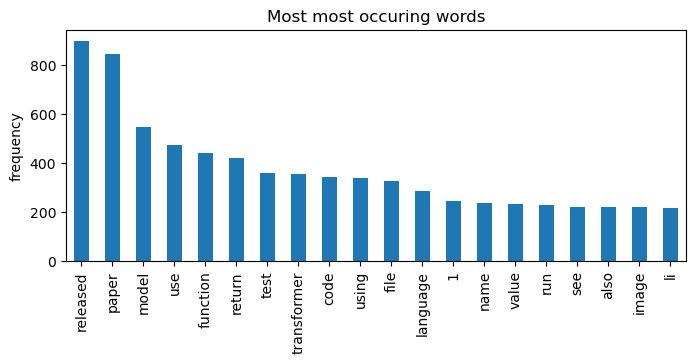

In [8]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(py_js).split()).value_counts().head(20).plot(kind="bar")
plt.title("Most most occuring words")
plt.ylabel("frequency")

**Words in readme that uniqely identify python or javascript**

In [9]:
py_df = pd.Series(" ".join(py).split()).value_counts()
js_df = pd.Series(" ".join(js).split()).value_counts()
all_df = pd.Series(" ".join(py_js).split()).value_counts()

freq_df = pd.concat([py_df, js_df, all_df], axis=1).set_axis(["py", "js", "all"], axis=1)
freq_df = freq_df.fillna(0)
freq_df.head()

,py,js,all
released,896.0,2.0,898
paper,844.0,0.0,844
model,531.0,15.0,546
transformer,355.0,0.0,355
language,274.0,9.0,283


Text(0, 0.5, 'frequency')

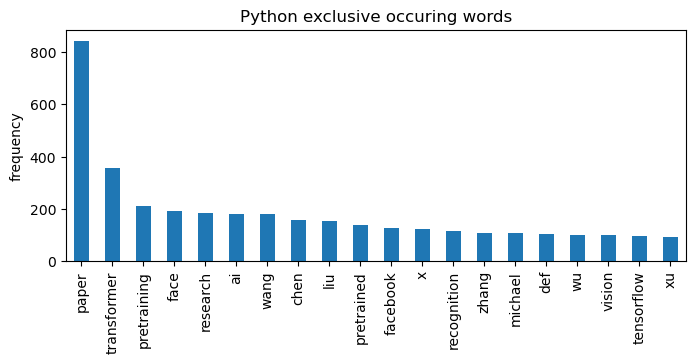

In [10]:
plt.figure(figsize=(8,3))
# words exclusive to python
freq_df["py"][freq_df["js"] == 0].head(20).plot(kind="bar")
plt.title("Python exclusive occuring words")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

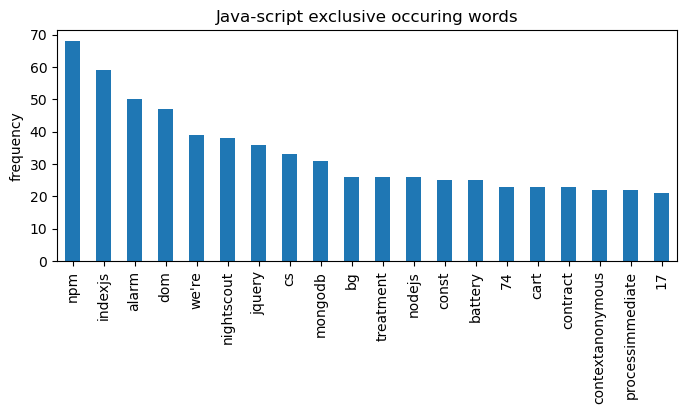

In [11]:
plt.figure(figsize=(8,3))
# words exclusive to python
freq_df["js"][freq_df["py"] == 0].head(20).plot(kind="bar")
plt.title("Java-script exclusive occuring words")
plt.ylabel("frequency")

**Within JavaScript and python code segments, which bigrams, or sequential pairs of words, are commonly encountered?**

In [12]:
py_doc = " ".join(py).split()
js_doc = " ".join(js).split()
all_doc = " ".join(py_js).split()

Text(0, 0.5, '# Occurances')

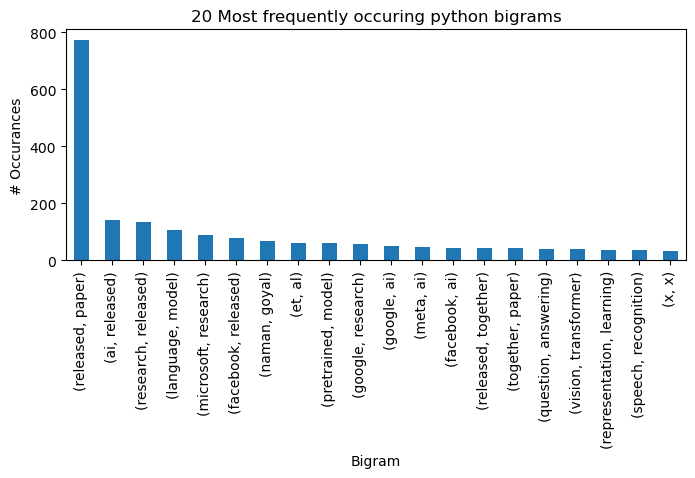

In [13]:
plt.figure(figsize=(8,3))
pd.Series(nltk.ngrams(py_doc, 2)).value_counts().head(20).plot(kind="bar")
plt.title('20 Most frequently occuring python bigrams')
plt.xlabel('Bigram')
plt.ylabel('# Occurances')

Text(0, 0.5, '# Occurances')

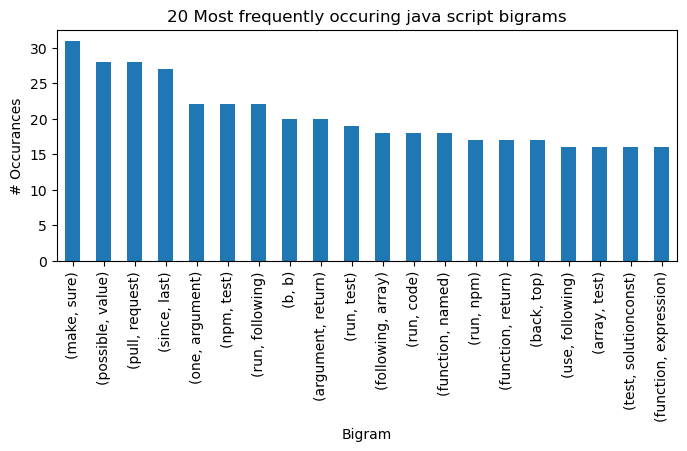

In [14]:
plt.figure(figsize=(8,3))
pd.Series(nltk.ngrams(js_doc, 2)).value_counts().head(20).plot(kind="bar")
plt.title('20 Most frequently occuring java script bigrams')
plt.xlabel('Bigram')
plt.ylabel('# Occurances')

Text(0, 0.5, '# Occurances')

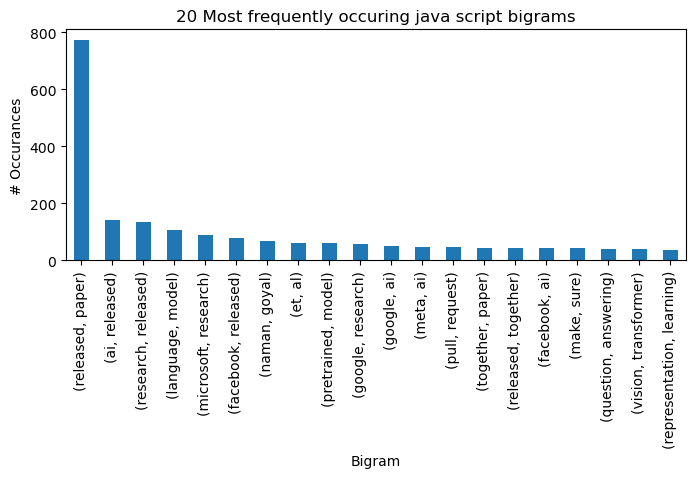

In [15]:
plt.figure(figsize=(8,3))
pd.Series(nltk.ngrams(all_doc, 2)).value_counts().head(20).plot(kind="bar")
plt.title('20 Most frequently occuring java script bigrams')
plt.xlabel('Bigram')
plt.ylabel('# Occurances')

In [16]:
train = pd.Series(" ".join(js).split()).value_counts().head(20)
train

function      352
test          338
use           203
code          194
name          183
file          178
value         175
return        174
using         169
run           155
see           148
array         134
string        132
first         128
need          118
number        118
error         116
variable      115
javascript     97
following      95
dtype: int64

**Take aways:**

- Python programming language appiers to be more commonly used in the content of README files.